# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Counts:
 fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Percentage:
 fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


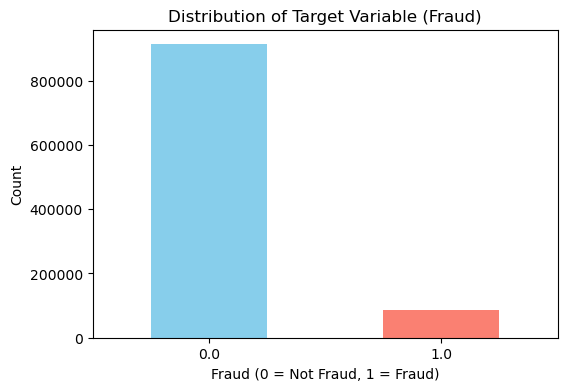

In [3]:
import matplotlib.pyplot as plt

# Check the target variable distribution
target_counts = fraud["fraud"].value_counts()
target_percent = fraud["fraud"].value_counts(normalize=True) * 100

print("Counts:\n", target_counts)
print("\nPercentage:\n", target_percent)

# Plot the distribution
plt.figure(figsize=(6,4))
target_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Target Variable (Fraud)")
plt.xlabel("Fraud (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = fraud.drop("fraud", axis=1)
y = fraud["fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9345166666666667

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000


Confusion Matrix:
 [[255490  18289]
 [  1356  24865]]


Classification Report:
               precision    recall  f1-score   support

         0.0     0.9947    0.9332    0.9630    273779
         1.0     0.5762    0.9483    0.7168     26221

    accuracy                         0.9345    300000
   macro avg     0.7855    0.9407    0.8399    300000
weighted avg     0.9581    0.9345    0.9415    300000


Confusion Matrix:
 [[255490  18289]
 [  1356  24865]]

ROC-AUC Score: 0.9796
Average Precision (PR-AUC): 0.7585


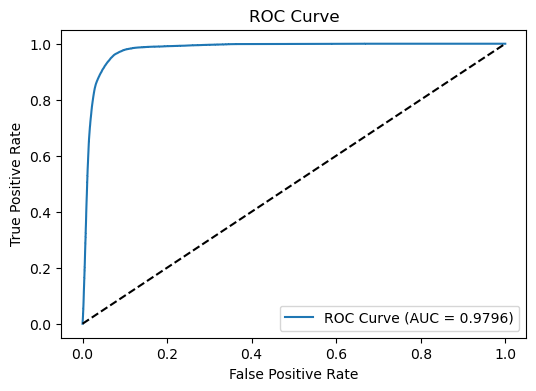

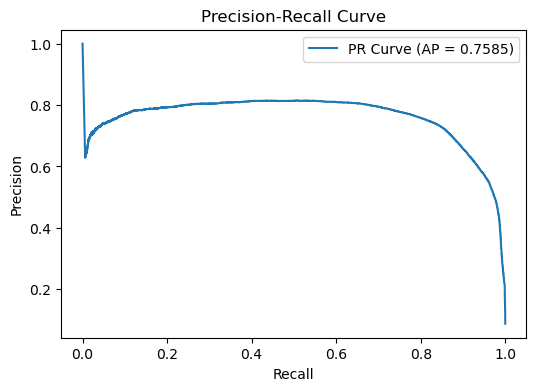

In [5]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, 
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt

# Classification report (shows precision, recall, f1)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# PR-AUC
avg_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision (PR-AUC): {avg_precision:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


Before SMOTE: fraud
0.0    638818
1.0     61182
Name: count, dtype: int64
After SMOTE: fraud
0.0    638818
1.0    638818
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9946    0.9338    0.9632    273779
         1.0     0.5780    0.9466    0.7177     26221

    accuracy                         0.9349    300000
   macro avg     0.7863    0.9402    0.8405    300000
weighted avg     0.9581    0.9349    0.9418    300000


Confusion Matrix:
 [[255655  18124]
 [  1399  24822]]

ROC-AUC Score: 0.9793
Average Precision (PR-AUC): 0.7628


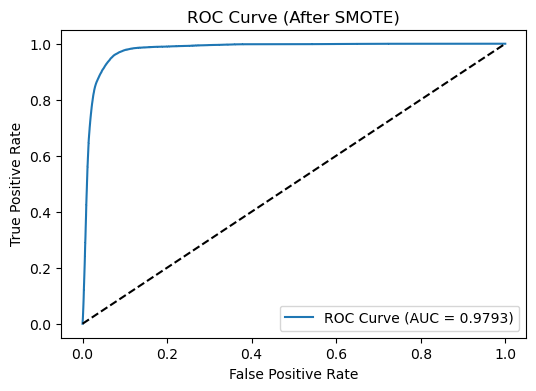

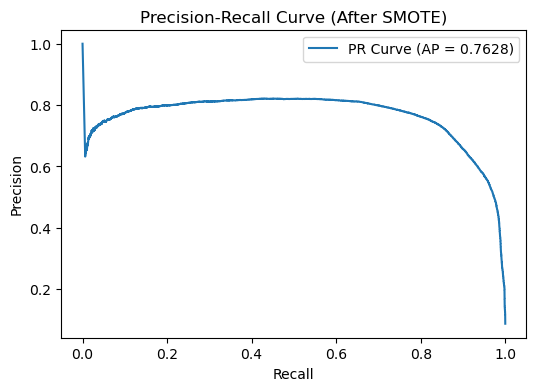

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score, roc_curve
)
import matplotlib.pyplot as plt

# --- Split into train/test first ---
X = fraud.drop("fraud", axis=1)
y = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Apply SMOTE only to training set ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# --- Scale features ---
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# --- Train Logistic Regression ---
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res_scaled, y_train_res)

# --- Predictions ---
y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_pred_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

roc_auc = roc_auc_score(y_test, y_pred_proba_smote)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

avg_precision = average_precision_score(y_test, y_pred_proba_smote)
print(f"Average Precision (PR-AUC): {avg_precision:.4f}")

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_smote)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (After SMOTE)")
plt.legend()
plt.show()

# --- Plot Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_smote)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (After SMOTE)")
plt.legend()
plt.show()


Before Undersampling: fraud
0.0    638818
1.0     61182
Name: count, dtype: int64
After Undersampling: fraud
0.0    61182
1.0    61182
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9948    0.9334    0.9631    273779
         1.0     0.5771    0.9493    0.7178     26221

    accuracy                         0.9348    300000
   macro avg     0.7860    0.9413    0.8405    300000
weighted avg     0.9583    0.9348    0.9417    300000


Confusion Matrix:
 [[255537  18242]
 [  1329  24892]]

ROC-AUC Score: 0.9796
Average Precision (PR-AUC): 0.7580


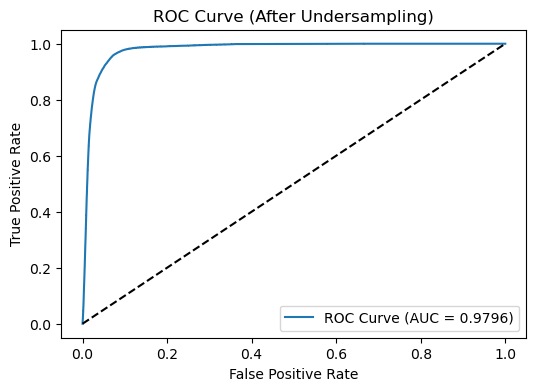

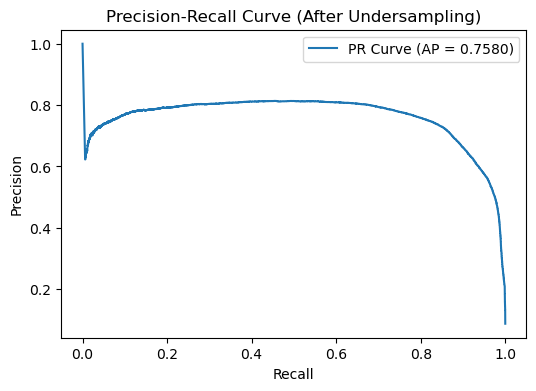

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score, roc_curve
)
import matplotlib.pyplot as plt

# --- Split into train/test first ---
X = fraud.drop("fraud", axis=1)
y = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Apply Random Undersampling only to training set ---
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Before Undersampling:", y_train.value_counts())
print("After Undersampling:", y_train_res.value_counts())

# --- Scale features ---
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# --- Train Logistic Regression ---
log_reg_rus = LogisticRegression(max_iter=1000, random_state=42)
log_reg_rus.fit(X_train_res_scaled, y_train_res)

# --- Predictions ---
y_pred_rus = log_reg_rus.predict(X_test_scaled)
y_pred_proba_rus = log_reg_rus.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---
print("\nClassification Report:\n", classification_report(y_test, y_pred_rus, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))

roc_auc = roc_auc_score(y_test, y_pred_proba_rus)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

avg_precision = average_precision_score(y_test, y_pred_proba_rus)
print(f"Average Precision (PR-AUC): {avg_precision:.4f}")

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rus)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (After Undersampling)")
plt.legend()
plt.show()

# --- Plot Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rus)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (After Undersampling)")
plt.legend()
plt.show()


Before SMOTE: fraud
0.0    638818
1.0     61182
Name: count, dtype: int64
After SMOTE: fraud
0.0    638818
1.0    638818
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9946    0.9338    0.9632    273779
         1.0     0.5780    0.9466    0.7177     26221

    accuracy                         0.9349    300000
   macro avg     0.7863    0.9402    0.8405    300000
weighted avg     0.9581    0.9349    0.9418    300000


Confusion Matrix:
 [[255655  18124]
 [  1399  24822]]

ROC-AUC Score: 0.9793
Average Precision (PR-AUC): 0.7628


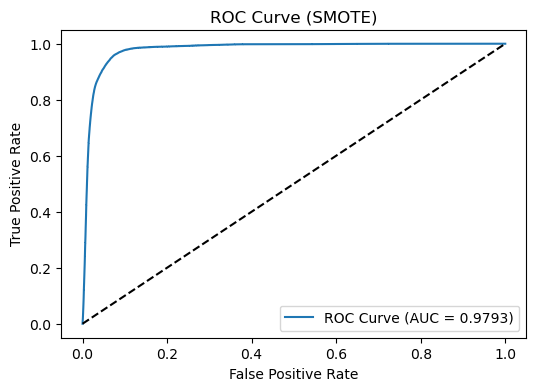

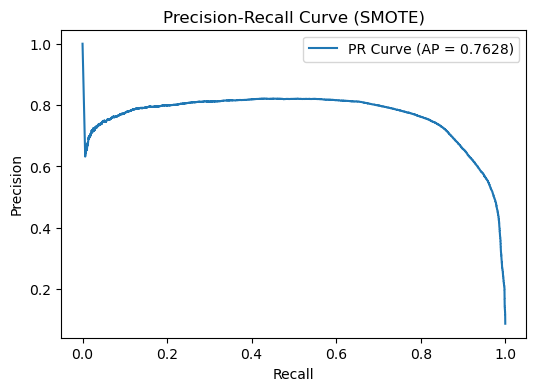

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score, roc_curve
)
import matplotlib.pyplot as plt

# --- Step 1: Split into train/test ---
X = fraud.drop("fraud", axis=1)
y = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Step 2: Apply SMOTE to training set ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# --- Step 3: Scale features ---
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# --- Train Logistic Regression ---
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res_scaled, y_train_res)

# --- Predictions ---
y_pred = log_reg_smote.predict(X_test_scaled)
y_pred_proba = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

avg_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision (PR-AUC): {avg_precision:.4f}")

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE)")
plt.legend()
plt.show()

# --- Plot Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SMOTE)")
plt.legend()
plt.show()
